Remember to change GPU \
[ Google Colab 環境使用免費 GPU](https://medium.com/@jamescchuang/%E5%9C%A8-google-colab-%E7%92%B0%E5%A2%83%E4%BD%BF%E7%94%A8%E5%85%8D%E8%B2%BB-gpu-%E9%96%8B%E7%99%BC-julia-d21e2e44bef4)

In [1]:
from google.colab import drive
mydrive = '/content/drive/'
drive.mount(mydrive)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [3]:
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update
!apt-get install cuda=8.0.61-1

--2020-05-29 07:06:16--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.0.24
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.0.24|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?j2PmEpgE3sGTUfWpqkMqpxpD6ghlOypyFDzSpJ-S3CrDsYQQRufsHvfzso-5qy0Yo6cy-v8zEEQciX7McvCQie8QYQXQWFVtwZCOv0PQiiaIm8mue2NDyP0hlaq8LiD7yvvIE78LnOxa6fRW9EN18o8XW3kROmm9rZcnf0msXcQiscv3x5G2PymgvtezSALATomZXYNZdwo5fhwcGvUufnzTXg [following]
--2020-05-29 07:06:16--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?j2PmEpgE3sGTUfWpqkMqpxpD6ghlOypyFDzSpJ-S3CrDsYQQRufsHvfzso-5qy0Yo6cy-v8zEEQciX7McvCQie8QYQXQWFVtwZ

In [4]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [0]:
"""
!sudo apt-get install libomp-dev
!wget  https://anaconda.org/pytorch/faiss-gpu/1.2.1/download/linux-64/faiss-gpu-1.2.1-py36_cuda9.0.176_1.tar.bz2
!tar xvjf faiss-gpu-1.2.1-py36_cuda9.0.176_1.tar.bz2
!cp -r lib/python3.6/site-packages/* /usr/local/lib/python3.6/dist-packages/
!pip install mkl
"""

'\n!sudo apt-get install libomp-dev\n!wget  https://anaconda.org/pytorch/faiss-gpu/1.2.1/download/linux-64/faiss-gpu-1.2.1-py36_cuda9.0.176_1.tar.bz2\n!tar xvjf faiss-gpu-1.2.1-py36_cuda9.0.176_1.tar.bz2\n!cp -r lib/python3.6/site-packages/* /usr/local/lib/python3.6/dist-packages/\n!pip install mkl\n'

In [0]:
"""
!apt install mkl
import mkl
mkl.get_max_threads()
"""

'\n!apt install mkl\nimport mkl\nmkl.get_max_threads()\n'

In [0]:
"""
!curl -L https://anaconda.org/pytorch/faiss-gpu/1.6.0/download/linux-64/faiss-gpu-1.6.0-py36h1a5d453_0.tar.bz2 | tar xj
!mv lib/python3.6/site-packages/* /usr/local/lib/python3.6/dist-packages
"""

'\n!curl -L https://anaconda.org/pytorch/faiss-gpu/1.6.0/download/linux-64/faiss-gpu-1.6.0-py36h1a5d453_0.tar.bz2 | tar xj\n!mv lib/python3.6/site-packages/* /usr/local/lib/python3.6/dist-packages\n'

In [0]:
!pip install mkl

In [0]:

# !pip uninstall libomp-dev
# !python -m pip install --upgrade faiss faiss-gpu
!pip install faiss-gpu==1.6.1


In [0]:
import faiss

In [0]:
import cv2, numpy as np
import os, glob
import matplotlib.pyplot as plt
import time

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# DataLoader

PIL讀取的影像為RGB順序，cv2讀取的影像為BGR順序。\
PyTorch 的transform 接口多是對應到PIL和numpy，多採用此兩個套件的功能可減少物件轉換的麻煩。

(589, 589)


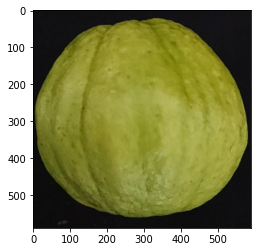

torch.Size([3, 224, 224])


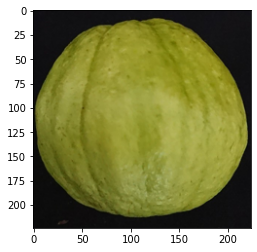

In [0]:
from torchvision import transforms
from PIL import Image
# 'My Drive/Project/0425guava-classified/'
iii = 'My Drive/Project/3.jpg'
img_path = os.path.join(mydrive + iii)

im = Image.open(img_path).convert('RGB')
print (im.size)
plt.imshow(im)
plt.show()
transform = transforms.Compose([
                transforms.Resize((224, 224),interpolation=3),
                transforms.ToTensor()
            ])

im_trns = transform(im)
print (im_trns.size())
plt.imshow(np.transpose(im_trns, (1, 2, 0)))
plt.show()

繼承自torch.utils.data.Dataset
主要寫__getitem__()和__len__()這兩個方法。

In [0]:
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms, utils

import torchvision.datasets as datasets
from scipy.io import loadmat
from PIL import Image
import os
"""
class guavaDataset(Dataset):
    def __init__(self, root, transform):
        self.transform = transform
        
    def __getitem__(self, index):
        return img

    def __len__(self):
        return len(self.imgs)
"""

'\nclass guavaDataset(Dataset):\n    def __init__(self, root, transform):\n        self.transform = transform\n        \n    def __getitem__(self, index):\n        return img\n\n    def __len__(self):\n        return len(self.imgs)\n'

In [0]:
transform = transforms.Compose([
                transforms.Resize((224, 224),interpolation=3),
                transforms.ToTensor()
            ])
mydrive = '/content/drive/'
img_path =  'My Drive/Project/0425guava-classified/'
dataset = datasets.ImageFolder(os.path.join(mydrive,img_path),
                                 transform=transform
                                )
print(len(dataset))

# data_loader = DataLoader(img_data, batch_size=20,shuffle=True)
data_loader = DataLoader(dataset, batch_size=1,shuffle=True)
print(len(data_loader))

721
721


In [0]:
def show_batch(imgs):
    grid = utils.make_grid(imgs,nrow=5)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    plt.title('Batch from dataloader')
    plt.axis('off')
    plt.show()


0 torch.Size([1, 3, 224, 224]) torch.Size([1])


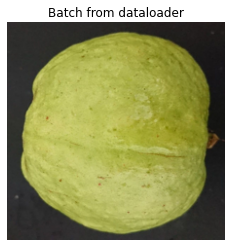

1 torch.Size([1, 3, 224, 224]) torch.Size([1])


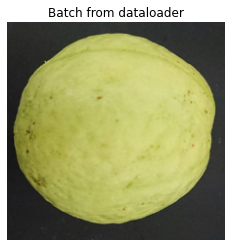

2 torch.Size([1, 3, 224, 224]) torch.Size([1])


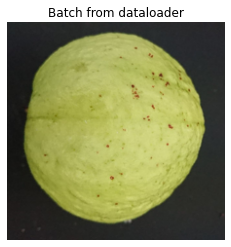

3 torch.Size([1, 3, 224, 224]) torch.Size([1])


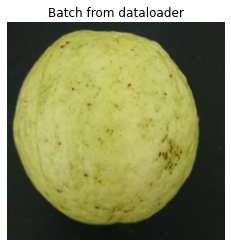

In [0]:
for i, (batch_x, batch_y) in enumerate(data_loader):
    if(i<4):
        print(i, batch_x.size(), batch_y.size())
        show_batch(batch_x)
    else:
        break


# Network - Vgg16
Simply bulid vgg16 by using **torchvision.models**. \
A model has two parts:
> features: those convnets (model.features) \
> classifier: those fcs (model.classifier) (a.k.a. top_layer, head)




In [0]:
import torchvision.models as models

model = models.vgg16(pretrained=True)

print(model)
print('===')
print('classifier:', model.classifier)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Don't freeze convnets

In [0]:
for param in model.features.parameters():
    param.requires_grad = True

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

# Train
We have to get the feature, cluster the feature, \
and compute the loss between cluster and fcnet. \


**‘model.eval()’ vs ‘with torch.no_grad()’**\

> model.eval():\
Notify all your layers that you are in eval mode.**Batchnorm or dropout layers will work in eval mode** instead of training mode.

> torch.no_grad():\
Dsable gradient calculation t will reduce memory usage and speed up computations but **you won’t be able to backpropagate**. You uauslly don’t want backpropagate in an eval script.


In [0]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [0]:
class Kmeans(object):
    def __init__(self, k):
        self.k = k

    def cluster(self, data, verbose=False):
        """Performs k-means clustering.
            Args:
                x_data (np.array N * dim): data to cluster
        """
        end = time.time()

        # PCA-reducing, whitening and L2-normalization
        xb = preprocess_features(data) #

        # cluster the data
        I, loss = run_kmeans(xb, self.k, verbose)
        self.images_lists = [[] for i in range(self.k)]
        for i in range(len(data)):
            self.images_lists[I[i]].append(i)

        if verbose:
            print('k-means time: {0:.0f} s'.format(time.time() - end))

        return loss

In [0]:
def run_kmeans(x, nmb_clusters, verbose=False):
    """Runs kmeans on 1 GPU.
    Args:
        x: data
        nmb_clusters (int): number of clusters
    Returns:
        list: ids of data in each cluster
    """
    n_data, d = x.shape

    # faiss implementation of k-means
    clus = faiss.Clustering(d, nmb_clusters)

    # Change faiss seed at each k-means so that the randomly picked
    # initialization centroids do not correspond to the same feature ids
    # from an epoch to another.
    clus.seed = np.random.randint(1234)

    clus.niter = 20
    clus.max_points_per_centroid = 10000000
    res = faiss.StandardGpuResources()
    flat_config = faiss.GpuIndexFlatConfig()
    flat_config.useFloat16 = False
    flat_config.device = 0
    index = faiss.GpuIndexFlatL2(res, d, flat_config)

    # perform the training
    clus.train(x, index)
    _, I = index.search(x, 1)
    losses = faiss.vector_to_array(clus.obj)
    if verbose:
        print('k-means loss evolution: {0}'.format(losses))

    return [int(n[0]) for n in I], losses[-1]

In [0]:
def preprocess_features(npdata, pca=256):
    """Preprocess an array of features.
    Args:
        npdata (np.array N * ndim): features to preprocess
        pca (int): dim of output
    Returns:
        np.array of dim N * pca: data PCA-reduced, whitened and L2-normalized
    """
    _, ndim = npdata.shape
    npdata =  npdata.astype('float32')

    # Apply PCA-whitening with Faiss
    mat = faiss.PCAMatrix (ndim, pca, eigen_power=-0.5)
    mat.train(npdata)
    assert mat.is_trained
    npdata = mat.apply_py(npdata)

    # L2 normalization
    row_sums = np.linalg.norm(npdata, axis=1)
    npdata = npdata / row_sums[:, np.newaxis]

    return npdata

cluster_assign ?

In [0]:
def cluster_assign(images_lists, dataset, transforms):
    """Creates a dataset from clustering, with clusters as labels.
    Args:
        images_lists (list of list): for each cluster, the list of image indexes
                                    belonging to this cluster
        dataset (list): initial dataset
    Returns:
        ReassignedDataset(torch.utils.data.Dataset): a dataset with clusters as
                                                     labels
    """
    assert images_lists is not None
    pseudolabels = []
    image_indexes = []
    for cluster, images in enumerate(images_lists):
        image_indexes.extend(images)
        pseudolabels.extend([cluster] * len(images))

    return ReassignedDataset(image_indexes, pseudolabels, dataset, transforms)

## train

In [0]:
def train(loader, model, crit, opt, epoch, opt_lr, opt_wd, verbose = True):
    """Training of the CNN.
        Args:
            loader (torch.utils.data.DataLoader): Data loader
            model (nn.Module): CNN
            crit (torch.nn): loss
            opt (torch.optim.SGD): optimizer for every parameters with True
                                   requires_grad in model except top layer
            epoch (int)
    """
    batch_time = AverageMeter()
    losses = AverageMeter()
    data_time = AverageMeter()
    forward_time = AverageMeter()
    backward_time = AverageMeter()

    # switch to train mode
    model.train()

    # create an optimizer for the last fc layer
    optimizer_tl = torch.optim.SGD(
        model.top_layer.parameters(),
        lr=opt_lr,
        weight_decay=opt_wd**10,
    )

    end = time.time()
    for i, (input_tensor, target) in enumerate(loader):
        data_time.update(time.time() - end)
        """
        # save checkpoint
        n = len(loader) * epoch + i
        if n % args.checkpoints == 0:
            path = os.path.join(
                args.exp,
                'checkpoints',
                'checkpoint_' + str(n / args.checkpoints) + '.pth.tar',
            )
            if args.verbose:
                print('Save checkpoint at: {0}'.format(path))
            torch.save({
                'epoch': epoch + 1,
                'arch': args.arch,
                'state_dict': model.state_dict(),
                'optimizer' : opt.state_dict()
            }, path)
        """
        target = target.cuda(async=True)
        input_var = torch.autograd.Variable(input_tensor.cuda())
        target_var = torch.autograd.Variable(target)

        output = model(input_var)
        loss = crit(output, target_var)

        # record loss
        losses.update(loss.data, input_tensor.size(0))

        # compute gradient and do SGD step
        opt.zero_grad()
        optimizer_tl.zero_grad()
        loss.backward()
        opt.step()
        optimizer_tl.step()

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if verbose and (i % 200) == 0:
            print('Epoch: [{0}][{1}/{2}]\t'
                  'Time: {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
                  'Data: {data_time.val:.3f} ({data_time.avg:.3f})\t'
                  'Loss: {loss.val:.4f} ({loss.avg:.4f})'
                  .format(epoch, i, len(loader), batch_time=batch_time,
                          data_time=data_time, loss=losses))

    return losses.avg


In [0]:
import torch.utils.data as data
class ReassignedDataset(data.Dataset):
    """A dataset where the new images labels are given in argument.
    Args:
        image_indexes (list): list of data indexes
        pseudolabels (list): list of labels for each data
        dataset (list): list of tuples with paths to images
        transform (callable, optional): a function/transform that takes in
                                        an PIL image and returns a
                                        transformed version
    """

    def __init__(self, image_indexes, pseudolabels, dataset, transform=None):
        self.imgs = self.make_dataset(image_indexes, pseudolabels, dataset)
        self.transform = transform

    def make_dataset(self, image_indexes, pseudolabels, dataset):
        label_to_idx = {label: idx for idx, label in enumerate(set(pseudolabels))}
        images = []
        for j, idx in enumerate(image_indexes):
            path = dataset[idx][0]
            pseudolabel = label_to_idx[pseudolabels[j]]
            images.append((path, pseudolabel))
        return images

    def __getitem__(self, index):
        """
        Args:
            index (int): index of data
        Returns:
            tuple: (image, pseudolabel) where pseudolabel is the cluster of index datapoint
        """
        path, pseudolabel = self.imgs[index]
        img = pil_loader(path)
        if self.transform is not None:
            img = self.transform(img)
        return img, pseudolabel

    def __len__(self):
        return len(self.imgs)


In [0]:
def compute_features(dataloader, model, N, batch_size):

    print('Compute features')
    model.eval()
    
    # discard the label information in the dataloader
    with torch.no_grad():
        for i, (input_tensor, _) in enumerate(dataloader):
            input_ = torch.autograd.Variable(input_tensor.cuda()) 
            # aux: the feature of a certain data
            aux = model(input_).data.cpu().numpy()
            # initialize
            if i == 0:
                features = np.zeros((N, aux.shape[1]), dtype='float32')

            aux = aux.astype('float32')
            if i < len(dataloader) - 1:
                features[i * batch_size: (i + 1) * batch_size] = aux
            else:
                features[i * batch_size:] = aux
            # print(aux.shape) # 1,4096

    return features

In [0]:
from torch.utils.data.sampler import Sampler
class UnifLabelSampler(Sampler):
    """Samples elements uniformely accross pseudolabels.
        Args:
            N (int): size of returned iterator.
            images_lists: dict of key (target), value (list of data with this target)
    """

    def __init__(self, N, images_lists):
        self.N = N
        self.images_lists = images_lists
        self.indexes = self.generate_indexes_epoch()

    def generate_indexes_epoch(self):
        nmb_non_empty_clusters = 0
        for i in range(len(self.images_lists)):
            if len(self.images_lists[i]) != 0:
                nmb_non_empty_clusters += 1

        size_per_pseudolabel = int(self.N / nmb_non_empty_clusters) + 1
        res = np.array([])

        for i in range(len(self.images_lists)):
            # skip empty clusters
            if len(self.images_lists[i]) == 0:
                continue
            indexes = np.random.choice(
                self.images_lists[i],
                size_per_pseudolabel,
                replace=(len(self.images_lists[i]) <= size_per_pseudolabel)
            )
            res = np.concatenate((res, indexes))

        np.random.shuffle(res)
        res = list(res.astype('int'))
        if len(res) >= self.N:
            return res[:self.N]
        res += res[: (self.N - len(res))]
        return res

    def __iter__(self):
        return iter(self.indexes)

    def __len__(self):
        return len(self.indexes)

In [0]:
def pil_loader(path):
    """Loads an image.
    Args:
        path (string): path to image file
    Returns:
        Image
    """
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')

# The main code

## Parameters

In [0]:
#######################################
num_classes = 10
batch_size= 100

# how many epochs of training between two consecutive reassignments of clusters
reassign = 1
# number of data loading workers 
workers = 4


opt_lr = 0.05

opt_momentum = 0.9
# weight decay pow 
opt_wd = -5


verbose = True
resume = os.path.join(mydrive,'My Drive/Project', 'checkpoint.pth.tar')
#######################################

# Debug

In [0]:
transform = transforms.Compose([
                transforms.Resize((224, 224),interpolation=3),
                transforms.ToTensor()
            ])
mydrive = '/content/drive/'
img_path =  'My Drive/Project/0425guava-classified/'
dataset = datasets.ImageFolder(os.path.join(mydrive,img_path),
                                 transform=transform
                                )
print(len(dataset))

# data_loader = DataLoader(img_data, batch_size=20,shuffle=True)
guava_dataloader = DataLoader(dataset, batch_size,shuffle=True)
print(len(data_loader))

721
721


## Step0

In [0]:
if resume:
    if os.path.isfile(resume):
        print("=> loading checkpoint '{}'".format(resume))
        checkpoint = torch.load(resume)
        start_epoch = checkpoint['epoch']
        # remove top_layer parameters from checkpoint
        for key in checkpoint['state_dict']:
            if 'top_layer' in key:
                del checkpoint['state_dict'][key]
        model.load_state_dict(checkpoint['state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer'])
        print("=> loaded checkpoint '{}' (epoch {})"
              .format(resume, checkpoint['epoch']))
    else:
        print("=> no checkpoint found at '{}'".format(resume))

=> no checkpoint found at '/content/drive/My Drive/Project/checkpoint.pth.tar'


## Step1
get the features for the whole dataset

In [0]:
import torchvision.models as models
model = models.vgg16(pretrained=True)
model = model.cuda()
# top layer: the last output layer


top_layer = nn.Linear(4096, num_classes)
fd = int(top_layer.weight.size()[1]) #4096
model.top_layer = None

# create optimizer
optimizer = torch.optim.SGD(
    filter(lambda x: x.requires_grad, model.parameters()),
    lr=opt_lr,
    momentum=opt_momentum,
    weight_decay=10**opt_wd
)

# define loss function
criterion = nn.CrossEntropyLoss().cuda()

# preprocessing of data
# TODO: normalize
transform = transforms.Compose([
                transforms.Resize((224, 224),interpolation=3),
                transforms.ToTensor()
            ])
mydrive = '/content/drive/'
img_path =  'My Drive/Project/0425guava-classified/'
dataset = datasets.ImageFolder(os.path.join(mydrive,img_path),
                                 transform=transform
                                )

# TODO: batch size
data_loader = DataLoader(dataset, batch_size,shuffle=True)

# specify clustering algorithm
deepcluster = Kmeans(num_classes)


t0 = time.time()
    
# “top layer” it’s more likely to be the last output layer (?)
model.top_layer = None
# we don't need 1000 classes
model.classifier = nn.Sequential(*list(model.classifier.children())[:-1])

# Step1: get the features for the whole dataset
print('Step1: get the features for the whole dataset')
features = compute_features(guava_dataloader, model, len(dataset), batch_size)



Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


NameError: ignored

## Step2 
cluster the features

In [0]:
# Step2: cluster the features
print('Step2: cluster the features')
clustering_loss = deepcluster.cluster(features, verbose)

## Step3
assign pseudo-labels

In [0]:
# Step3: assign pseudo-labels
print('Step3: assign pseudo-labels')
train_dataset = cluster_assign(deepcluster.images_lists, dataset.imgs, transform) #?

## Step4 
uniformly sample for each target

In [0]:
# Step4: uniformly sample for each target
print('Step4: uniformly sample for each target')
sampler = UnifLabelSampler(int(reassign * len(train_dataset)), deepcluster.images_lists)
train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    num_workers=workers,
    sampler=sampler,
    pin_memory=True,
)

## Step5 
set last fully connected layer

In [0]:
# Step5: set last fully connected layer
print('Step5: set last fully connected layer')
mlp = list(model.classifier.children())
print(*mlp) 
# add another ReLU
mlp.append(nn.ReLU(inplace=True).cuda())
# print(*mlp) 
model.classifier = nn.Sequential(*mlp)

model.top_layer = nn.Linear(fd, len(deepcluster.images_lists))
model.top_layer.weight.data.normal_(0, 0.01)
model.top_layer.bias.data.zero_()
model.top_layer.cuda()
print(model)


## Step6
train network with clusters as pseudo-labels

In [0]:
# Step6: train network with clusters as pseudo-labels
print('Step6: train network with clusters as pseudo-labels')

t1 = time.time()

print(' time {}'.format((t1 - t0)))
epoch = 1
loss = train(train_dataloader, model, criterion, optimizer, epoch, \
             opt_lr, opt_wd, verbose)

## Step7
save running checkpoint

In [0]:
# save running checkpoint
torch.save({'epoch': epoch + 1,
            'state_dict': model.state_dict(),
            'optimizer' : optimizer.state_dict()},
            os.path.join(mydrive,'My Drive/Project', 'checkpoint.pth.tar'))

Do some finetune if you want

In [0]:
# model.features[0] = nn.Conv2d(1, 64, 3, 1, 1)
# model.classifier[-1] = nn.Linear(4096, 1000)
# model.classifier.add_module('7', nn.ReLU())
# model.classifier.add_module('8', nn.Dropout(p=0.5, inplace=False))
# model.classifier.add_module('9', nn.Linear(1000, 10))
# model.classifier.add_module('10', nn.LogSoftmax(dim=1))
# print(model)

# =========================================

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class VGG16(nn.Module):
    def __init__(self, n_classes):
        super(VGG16, self).__init__()
        # conv layers: (in_channel size, out_channels size, kernel_size, stride, padding)
        self.conv1_1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv1_2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)

        self.conv2_1 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv2_2 = nn.Conv2d(128, 128, kernel_size=3, padding=1)

        self.conv3_1 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv3_2 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv3_3 = nn.Conv2d(256, 256, kernel_size=3, padding=1)

        self.conv4_1 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv4_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv4_3 = nn.Conv2d(512, 512, kernel_size=3, padding=1)

        self.conv5_1 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_3 = nn.Conv2d(512, 512, kernel_size=3, padding=1)

        # max pooling (kernel_size, stride)
        self.pool = nn.MaxPool2d(2, 2)

        # fully conected layers:
        # beware: size might change because of your input!
        self.fc6 = nn.Linear(7*7*512, 4096)
        self.fc7 = nn.Linear(4096, 4096)
        self.fc8 = nn.Linear(4096, 1000)

    def forward(self, x, training=True):
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = self.pool(x)
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = self.pool(x)
        x = F.relu(self.conv3_1(x))
        x = F.relu(self.conv3_2(x))
        x = F.relu(self.conv3_3(x))
        x = self.pool(x)
        x = F.relu(self.conv4_1(x))
        x = F.relu(self.conv4_2(x))
        x = F.relu(self.conv4_3(x))
        x = self.pool(x)
        x = F.relu(self.conv5_1(x))
        x = F.relu(self.conv5_2(x))
        x = F.relu(self.conv5_3(x))
        x = self.pool(x)
        x = x.view(-1, 7 * 7 * 512)
        x = F.relu(self.fc6(x))
        x = F.dropout(x, 0.5, training=training)
        x = F.relu(self.fc7(x))
        x = F.dropout(x, 0.5, training=training)
        x = self.fc8(x)
        return x
        
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

    def predict(self, x):
        # a function to predict the labels of a batch of inputs
        x = F.softmax(self.forward(x, training=False))
        return x

    def accuracy(self, x, y):
        # a function to calculate the accuracy of label prediction for a batch of inputs
        #   x: a batch of inputs
        #   y: the true labels associated with x
        prediction = self.predict(x)
        maxs, indices = torch.max(prediction, 1)
        acc = 100 * torch.sum(torch.eq(indices.float(), y.float()).float())/y.size()[0]
        return acc.cpu().data[0]

In [0]:
"""
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print("upload to GPU...")
    model = model.cuda()
    for data, target in data_loader:
        data = data.to(device)
        target = target.to(device)
        print('Epoch {}, loss {}, time {}'.format(
            epoch, loss.item(), (t1 - t0)))
"""